In [1]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Selecting previously unselected package libta-lib0.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 270 kB 4.7 MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.21-cp37-cp37m-linux_x86_64.whl size=1444940 sha256=ad398c53a753826a7d62512a37cd033d11f8699055d56ff15e47abc5b8e3d9b0
  Stored in directory: /root/.cache/pip/wheels/32/3c/86/8dfaee7c11df54449f188172fcf66ae6d134f3118d0237df4a
Successfully built ta-lib


In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=f0e3b219542b83177ce7867600c7b84e9ad3b8952dad3af3a996691dffb65ece
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import pandas as pd

In [4]:
visa = yf.Ticker("V")

In [5]:
print(visa)

yfinance.Ticker object <V>


# New section

jpmc jpm
mastercard ma
apple aapl
netflix nflx
visa V

In [6]:
tickers = ["V"]

In [7]:
stocks = yf.download(tickers, start = "2008-03-27", end = "2021-04-23")

[*********************100%***********************]  1 of 1 completed


In [8]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-03-27,16.012501,16.184999,15.6625,15.7275,14.351497,39829600
2008-03-28,15.842500,15.860000,15.5400,15.6900,14.317278,24675200
2008-03-31,15.650000,15.870000,15.5125,15.5900,14.226029,22157200
2008-04-01,15.765000,15.920000,15.0775,15.4025,14.054929,60410800
2008-04-02,15.430000,15.580000,15.1250,15.5800,14.216905,43836400


In [9]:
shifting = stocks.shift(periods=1, freq=None, axis=0)  

In [10]:
shifting

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-03-27,NaN,NaN,NaN,NaN,NaN,NaN
2008-03-28,16.012501,16.184999,15.662500,15.727500,14.351497,39829600.0
2008-03-31,15.842500,15.860000,15.540000,15.690000,14.317278,24675200.0
2008-04-01,15.650000,15.870000,15.512500,15.590000,14.226029,22157200.0
2008-04-02,15.765000,15.920000,15.077500,15.402500,14.054929,60410800.0
...,...,...,...,...,...,...
2021-04-16,223.889999,227.630005,223.860001,226.279999,225.951797,8698100.0
2021-04-19,227.169998,227.800003,225.759995,226.410004,226.081619,6829400.0
2021-04-20,225.750000,227.580002,225.080002,225.789993,225.462509,6541600.0


In [11]:
y = (shifting['Close'] - stocks['Close'])/stocks['Close']

In [12]:
import talib as ta

In [13]:
df = pd.DataFrame()

In [14]:
df

""


###Overlap Studies

In [15]:
df['upperband'], df['middleband'], df['lowerband'] = ta.BBANDS(stocks['Close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
df['DEMA'] = ta.DEMA(stocks['Close'], timeperiod=30)
df['EMA'] = ta.EMA(stocks['Close'], timeperiod=30)
df['HT_TRENDLINE'] = ta.HT_TRENDLINE(stocks['Close'])
df['KAMA'] = ta.KAMA(stocks['Close'], timeperiod=30)
df['MA'] = ta.MA(stocks['Close'], timeperiod=30, matype=0)
#df['mama'], df['fama'] = ta.MAMA(stocks['Close'], fastlimit=0, slowlimit=0)
#df['MAVP'] = ta.MAVP(stocks['Close'], periods, minperiod=2, maxperiod=30, matype=0)
df['MIDPOINT'] = ta.MIDPOINT(stocks['Close'], timeperiod=14)
df['MIDPRICE'] = ta.MIDPRICE(stocks['High'], stocks['Low'], timeperiod=14)
df['SAR'] = ta.SAR(stocks['High'], stocks['Low'], acceleration=0, maximum=0)
df['SAREXT'] = ta.SAREXT(stocks['High'], stocks['Low'], startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
df['SMA'] = ta.SMA(stocks['Close'], timeperiod=30)
df['T3'] = ta.T3(stocks['Close'], timeperiod=5, vfactor=0)
df['TEMA'] = ta.TEMA(stocks['Close'], timeperiod=30)
df['TRIMA'] = ta.TRIMA(stocks['Close'], timeperiod=30)
df['WMA'] = ta.WMA(stocks['Close'], timeperiod=30)


In [16]:
df.dropna()

,upperband,middleband,lowerband,DEMA,EMA,HT_TRENDLINE,KAMA,MA,MIDPOINT,MIDPRICE,SAR,SAREXT,SMA,T3,TEMA,TRIMA,WMA
Date,,,,,,,,,,,,,,,,,
2008-07-30,19.983378,18.350500,16.717622,18.456626,18.988059,19.280579,19.969600,19.247000,18.358749,18.176250,15.0775,15.0775,19.247000,18.261040,18.141006,19.081146,18.729258
2008-07-31,19.924825,18.499500,17.074175,18.400624,18.941410,19.227606,19.926484,19.157000,18.358749,18.176250,15.0775,15.0775,19.157000,18.311735,18.096616,18.961948,18.665903
2008-08-01,19.930408,18.488000,17.045592,18.309531,18.876319,19.103776,19.866930,19.052500,18.358749,18.176250,15.0775,15.0775,19.052500,18.338945,18.000812,18.846698,18.586903
2008-08-04,19.838198,18.585500,17.332802,18.252280,18.827847,18.955626,19.822321,18.960250,18.566250,18.176250,15.0775,15.0775,18.960250,18.344219,17.955267,18.741490,18.527065
2008-08-05,19.653630,18.467000,17.280369,18.235988,18.800244,18.837869,19.798206,18.898083,18.566250,18.350000,15.0775,15.0775,18.898083,18.343692,17.968719,18.653125,18.490919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,228.228256,223.432001,218.635745,221.636318,217.806863,216.703646,214.750164,218.211000,219.070000,219.459999,10.4450,10.4450,218.211000,220.071036,222.853038,215.779374,218.532171
2021-04-19,228.920569,224.295999,219.671430,222.386109,218.321904,217.508104,215.047940,218.556999,219.070000,219.605003,10.4450,10.4450,218.556999,220.977283,223.743937,215.936332,219.021139
2021-04-20,228.327037,224.747998,221.168959,222.743020,218.641781,218.302299,215.121545,218.657332,219.070000,219.675003,10.4450,10.4450,218.657332,221.733609,224.047889,216.137665,219.325848


###Momentum Indicators

In [17]:
df['ADX'] = ta.ADX(stocks['High'], stocks['Low'], stocks['Close'], timeperiod=14)
df['ADXR'] = ta.ADXR(stocks['High'], stocks['Low'], stocks['Close'], timeperiod=14)
df['aroondown'], df['aroonup'] = ta.AROON(stocks['High'], stocks['Low'], timeperiod=14)
df['AROONOSC'] = ta.AROONOSC(stocks['High'], stocks['Low'], timeperiod=14)
df['BOP'] = ta.BOP(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CCI'] = ta.CCI(stocks['High'], stocks['Low'], stocks['Close'], timeperiod=14)
df['DX'] = ta.DX(stocks['High'], stocks['Low'], stocks['Close'], timeperiod=14)
df['MFI'] = ta.MFI(stocks['High'], stocks['Low'], stocks['Close'], stocks['Volume'], timeperiod=14)
df['MINUS_DI'] = ta.MINUS_DI(stocks['High'], stocks['Low'], stocks['Close'], timeperiod=14)
df['MINUS_DM'] = ta.MINUS_DM(stocks['High'], stocks['Low'], timeperiod=14)
df['PLUS_DI'] = ta.PLUS_DI(stocks['High'], stocks['Low'], stocks['Close'], timeperiod=14)
df['PLUS_DM'] = ta.PLUS_DM(stocks['High'], stocks['Low'], timeperiod=14)
df['PPO'] = ta.PPO(stocks['Close'], fastperiod=12, slowperiod=26, matype=0)


In [18]:
df['APO'] = ta.APO(stocks['Close'], fastperiod=12, slowperiod=26, matype=0)
df['CMO'] = ta.CMO(stocks['Close'], timeperiod=14)
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(stocks['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['macdext'], df['macdsignalext'], df['macdhistext'] = ta.MACDEXT(stocks['Close'], fastperiod=12, fastmatype=0, slowperiod=26, slowmatype=0, signalperiod=9, signalmatype=0)
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACDFIX(stocks['Close'], signalperiod=9)
df['MOM'] = ta.MOM(stocks['Close'], timeperiod=10)
df['ROC'] = ta.ROC(stocks['Close'], timeperiod=10)
df['ROCP'] = ta.ROCP(stocks['Close'], timeperiod=10)
df['ROCR'] = ta.ROCR(stocks['Close'], timeperiod=10)
df['ROCR100'] = ta.ROCR100(stocks['Close'], timeperiod=10)
df['RSI'] = ta.RSI(stocks['Close'], timeperiod=14)
df['fastk'], df['fastd'] = ta.STOCHRSI(stocks['Close'], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
df['TRIX'] = ta.TRIX(stocks['Close'], timeperiod=30)
df['HT_DCPERIOD'] = ta.HT_DCPERIOD(stocks['Close'])
df['HT_DCPHASE'] = ta.HT_DCPHASE(stocks['Close'])
df['inphase'], df['quadrature'] = ta.HT_PHASOR(stocks['Close'])
df['sine'], df['leadsine'] = ta.HT_SINE(stocks['Close'])
df['HT_TRENDMODE'] = ta.HT_TRENDMODE(stocks['Close'])
df['OBV'] = ta.OBV(stocks['Close'], stocks['Volume'])
df['AVGPRICE'] = ta.AVGPRICE(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['MEDPRICE'] = ta.MEDPRICE(stocks['High'], stocks['Low'])
df['TYPPRICE'] = ta.TYPPRICE(stocks['High'], stocks['Low'], stocks['Close'])
df['WCLPRICE'] = ta.WCLPRICE(stocks['High'], stocks['Low'], stocks['Close'])
df['ATR'] = ta.ATR(stocks['High'], stocks['Low'], stocks['Close'], timeperiod=14)
df['NATR'] = ta.NATR(stocks['High'], stocks['Low'], stocks['Close'], timeperiod=14)
df['TRANGE'] = ta.TRANGE(stocks['High'], stocks['Low'], stocks['Close'])

In [19]:
df['CDL2CROWS'] = ta.CDL2CROWS(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDL3BLACKCROWS'] = ta.CDL3BLACKCROWS(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDL3INSIDE'] = ta.CDL3INSIDE(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDL3LINESTRIKE'] = ta.CDL3LINESTRIKE(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDL3OUTSIDE'] = ta.CDL3OUTSIDE(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDL3STARSINSOUTH'] = ta.CDL3STARSINSOUTH(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDL3WHITESOLDIERS'] = ta.CDL3WHITESOLDIERS(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLABANDONEDBABY'] = ta.CDLABANDONEDBABY(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'], penetration=0)
df['CDLADVANCEBLOCK'] = ta.CDLADVANCEBLOCK(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLBELTHOLD'] = ta.CDLBELTHOLD(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLBREAKAWAY'] = ta.CDLBREAKAWAY(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLCLOSINGMARUBOZU'] = ta.CDLCLOSINGMARUBOZU(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLCONCEALBABYSWALL'] = ta.CDLCONCEALBABYSWALL(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLCOUNTERATTACK'] = ta.CDLCOUNTERATTACK(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLDARKCLOUDCOVER'] = ta.CDLDARKCLOUDCOVER(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'], penetration=0)
df['CDLDOJI'] = ta.CDLDOJI(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLDOJISTAR'] = ta.CDLDOJISTAR(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLDRAGONFLYDOJI'] = ta.CDLDRAGONFLYDOJI(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLENGULFING'] = ta.CDLENGULFING(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLEVENINGDOJISTAR'] = ta.CDLEVENINGDOJISTAR(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'], penetration=0)
df['CDLEVENINGSTAR'] = ta.CDLEVENINGSTAR(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'], penetration=0)
df['CDLGAPSIDESIDEWHITE'] = ta.CDLGAPSIDESIDEWHITE(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLGRAVESTONEDOJI'] = ta.CDLGRAVESTONEDOJI(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLHAMMER'] = ta.CDLHAMMER(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLHANGINGMAN'] = ta.CDLHANGINGMAN(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLHARAMI'] = ta.CDLHARAMI(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLHARAMICROSS'] = ta.CDLHARAMICROSS(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLHIGHWAVE'] = ta.CDLHIGHWAVE(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLHIKKAKE'] = ta.CDLHIKKAKE(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLHIKKAKEMOD'] = ta.CDLHIKKAKEMOD(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLHOMINGPIGEON'] = ta.CDLHOMINGPIGEON(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLIDENTICAL3CROWS'] = ta.CDLIDENTICAL3CROWS(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLINNECK'] = ta.CDLINNECK(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLINVERTEDHAMMER'] = ta.CDLINVERTEDHAMMER(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLKICKING'] = ta.CDLKICKING(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLKICKINGBYLENGTH'] = ta.CDLKICKINGBYLENGTH(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLLADDERBOTTOM'] = ta.CDLLADDERBOTTOM(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLLONGLEGGEDDOJI'] = ta.CDLLONGLEGGEDDOJI(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLLONGLINE'] = ta.CDLLONGLINE(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLMARUBOZU'] = ta.CDLMARUBOZU(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLMATCHINGLOW'] = ta.CDLMATCHINGLOW(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLMATHOLD'] = ta.CDLMATHOLD(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'], penetration=0)
df['CDLMORNINGDOJISTAR'] = ta.CDLMORNINGDOJISTAR(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'], penetration=0)
df['CDLMORNINGSTAR'] = ta.CDLMORNINGSTAR(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'], penetration=0)
df['CDLONNECK'] = ta.CDLONNECK(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLPIERCING'] = ta.CDLPIERCING(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLRICKSHAWMAN'] = ta.CDLRICKSHAWMAN(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLRISEFALL3METHODS'] = ta.CDLRISEFALL3METHODS(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLSEPARATINGLINES'] = ta.CDLSEPARATINGLINES(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLSHOOTINGSTAR'] = ta.CDLSHOOTINGSTAR(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLSHORTLINE'] = ta.CDLSHORTLINE(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLSPINNINGTOP'] = ta.CDLSPINNINGTOP(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLSTALLEDPATTERN'] = ta.CDLSTALLEDPATTERN(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLSTICKSANDWICH'] = ta.CDLSTICKSANDWICH(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLTAKURI'] = ta.CDLTAKURI(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLTASUKIGAP'] = ta.CDLTASUKIGAP(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLTHRUSTING'] = ta.CDLTHRUSTING(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLTRISTAR'] = ta.CDLTRISTAR(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLUNIQUE3RIVER'] = ta.CDLUNIQUE3RIVER(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLUPSIDEGAP2CROWS'] = ta.CDLUPSIDEGAP2CROWS(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])
df['CDLXSIDEGAP3METHODS'] = ta.CDLXSIDEGAP3METHODS(stocks['Open'], stocks['High'], stocks['Low'], stocks['Close'])

In [20]:
from math import tanh
df['Outputs'] = y>0

In [21]:
df

,upperband,middleband,lowerband,DEMA,EMA,HT_TRENDLINE,KAMA,MA,MIDPOINT,MIDPRICE,SAR,SAREXT,SMA,T3,TEMA,TRIMA,WMA,ADX,ADXR,aroondown,aroonup,AROONOSC,BOP,CCI,DX,MFI,MINUS_DI,MINUS_DM,PLUS_DI,PLUS_DM,PPO,APO,CMO,macd,macdsignal,macdhist,macdext,macdsignalext,macdhistext,MOM,...,CDLGRAVESTONEDOJI,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Outputs
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.545457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2008-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.184999,-16.184999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.476563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
2008-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.184999,-16.184999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.167831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.184999,-16.184999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.430267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
2008-04-02,15.823995,15.598000,15.372005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.184999,-16.184999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-16,228.228256,223.432001,218.635745,221.636318,217.806863,216.703646,214.750164,218.211000,219.070000,219.459999,10.445000,10.445000,218.211000,220.071036,222.853038,215.779374,218.532171,19.732764,18.984475,0.0,100.000000,100.000000,-0.372545,143.529736,37.098047,69.198137,13.955846,7.964651,30.417485,17.359368,1.159819,2.528013,31.957424,2.621616,1.712089,0.909526,2.528013,-0.854709,3.382722,9.550003,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,0,0,0,0,0,0,0,0,False
2021-04-19,228.920569,224.295999,219.671430,222.386109,218.321904,217.508104,215.047940,218.556999,219.070000,219.605003,10.445000,10.445000,218.556999,220.977283,223.743937,215.936332,219.021139,20.697922,18.876411,0.0,92.857143,92.857143,0.015997,119.775321,33.244975,62.447998,14.552482,8.075740,29.047178,16.119413,1.703825,3.713526,28.841550,2.781940,1.926059,0.855880,3.713526,0.030519,3.683006,6.750000,...,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,True
2021-04-20,228.327037,224.747998,221.168959,222.743020,218.641781,218.302299,215.121545,218.657332,219.070000,219.675003,10.445000,10.445000,218.657332,221.733609,224.047889,216.137665,219.325848,20.388127,18.173060,0.0,85.714286,85.714286,-0.421349,60.142063,16.360799,62.099313,19.385385,10.758896,26.969397,14.968026,1.968725,4

In [22]:
df.dropna(inplace=True)

In [23]:
df.columns

Index(['upperband', 'middleband', 'lowerband', 'DEMA', 'EMA', 'HT_TRENDLINE',
       'KAMA', 'MA', 'MIDPOINT', 'MIDPRICE',
       ...
       'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP',
       'CDLTHRUSTING', 'CDLTRISTAR', 'CDLUNIQUE3RIVER', 'CDLUPSIDEGAP2CROWS',
       'CDLXSIDEGAP3METHODS', 'Outputs'],
      dtype='object', length=125)

In [24]:
from sklearn.preprocessing import StandardScaler
 
scale= StandardScaler()
df_X = df.iloc[:,:124]
# standardization of dependent variables
scaled_data = scale.fit_transform(df_X) 
print(scaled_data)
scaled_data.shape

[[-0.97034637 -0.98833027 -1.00633891 ... -0.04679266  0.02499219
  -0.01249317]
 [-0.97025646 -0.98851989 -1.00682132 ... -0.04679266  0.02499219
  -0.01249317]
 [-0.97174148 -0.98691221 -1.00197383 ... -0.04679266  0.02499219
  -0.01249317]
 ...
 [ 2.38591173  2.41251411  2.43834652 ... -0.04679266  0.02499219
  -0.01249317]
 [ 2.39067631  2.43055315  2.47028199 ... -0.04679266  0.02499219
  -0.01249317]
 [ 2.40021004  2.43480736  2.46899961 ... -0.04679266  0.02499219
  -0.01249317]]


(3204, 124)

In [25]:
processed_data = pd.concat([pd.DataFrame(scaled_data,columns = df.columns[:124]),df['Outputs'].reset_index()],axis=1)

In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
processed_data['Outputs']=label.fit_transform(processed_data['Outputs'])

In [27]:
processed_data

,upperband,middleband,lowerband,DEMA,EMA,HT_TRENDLINE,KAMA,MA,MIDPOINT,MIDPRICE,SAR,SAREXT,SMA,T3,TEMA,TRIMA,WMA,ADX,ADXR,aroondown,aroonup,AROONOSC,BOP,CCI,DX,MFI,MINUS_DI,MINUS_DM,PLUS_DI,PLUS_DM,PPO,APO,CMO,macd,macdsignal,macdhist,macdext,macdsignalext,macdhistext,MOM,...,CDLHAMMER,CDLHANGINGMAN,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLHIKKAKEMOD,CDLHOMINGPIGEON,CDLIDENTICAL3CROWS,CDLINNECK,CDLINVERTEDHAMMER,CDLKICKING,CDLKICKINGBYLENGTH,CDLLADDERBOTTOM,CDLLONGLEGGEDDOJI,CDLLONGLINE,CDLMARUBOZU,CDLMATCHINGLOW,CDLMATHOLD,CDLMORNINGDOJISTAR,CDLMORNINGSTAR,CDLONNECK,CDLPIERCING,CDLRICKSHAWMAN,CDLRISEFALL3METHODS,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Date,Outputs
0,-0.970346,-0.988330,-1.006339,-0.990336,-0.978193,-0.973317,-0.961880,-0.974144,-0.989769,-0.992126,0.833629,0.794924,-0.974144,-0.990537,-0.994954,-0.977128,-0.983800,1.173907,0.908335,-0.544754,0.958758,0.878613,-0.951403,0.334924,-0.063130,-0.894439,0.862006,-0.184605,-1.105560,-0.525343,-1.617558,-0.502175,-0.862610,-0.574660,-0.709555,0.238539,-0.502175,-0.714609,0.354593,-0.261236,...,-0.133376,0.15376,-0.017739,0.0,-0.024803,0.011371,0.0,-0.116633,0.0,0.035355,-0.128442,0.0,0.0,-0.039535,-0.401085,-0.067341,-0.048811,-0.132158,0.0,-0.061314,-0.09722,0.050031,-0.061314,-0.334834,0.0,-0.01216,0.118,-0.004490,-0.012715,0.043315,-0.046793,-0.113852,-0.020269,0.075165,-0.006678,-0.046793,0.024992,-0.012493,2008-07-31,1
1,-0.970256,-0.988520,-1.006821,-0.991836,-0.979278,-0.975376,-0.962872,-0.975884,-0.989769,-0.992126,0.833629,0.794924,-0.975884,-0.990087,-0.996531,-0.979046,-0.985111,1.110835,1.028871,-0.748654,0.754512,0.878613,-0.846203,-0.491162,0.159658,-0.952491,0.893649,-0.183545,-1.273200,-0.557743,-1.413959,-0.458382,-1.036170,-0.588246,-0.694381,0.157194,-0.458382,-0.683187,0.383786,-0.242380,...,-0.133376,0.15376,-0.017739,0.0,-0.024803,0.011371,0.0,-0.116633,0.0,0.035355,-0.128442,0.0,0.0,-0.039535,-0.401085,-0.067341,-0.048811,-0.132158,0.0,-0.061314,-0.09722,0.050031,-0.061314,-0.334834,0.0,-0.01216,0.118,-0.004490,-0.012715,0.043315,-0.046793,-0.113852,-0.020269,0.075165,-0.006678,-0.046793,0.024992,-0.012493,2008-08-01,1
2,-0.971741,-0.986912,-1.001974,-0.992779,-0.980085,-0.977840,-0.963614,-0.977420,-0.986325,-0.992126,0.833629,0.794924,-0.977420,-0.989999,-0.997280,-0.980798,-0.986104,1.052267,1.100547,-0.952555,0.550266,0.878613,0.607240,-0.426544,0.159658,-0.486018,0.745451,-0.228153,-1.364098,-0.587829,-1.393827,-0.453393,-0.909188,-0.584866,-0.681510,0.132109,-0.453393,-0.650491,0.330459,-0.112674,...,-0.133376,0.15376,-0.017739,0.0,-0.024803,0.011371,0.0,-0.116633,0.0,0.035355,-0.128442,0.0,0.0,-0.039535,-0.401085,-0.067341,-0.048811,-0.132158,0.0,-0.061314,-0.09722,0.050031,-0.061314,-0.334834,0.0,-0.01216,0.118,-0.004490,-0.012715,0.043315,-0.046793,-0.113852,-0.020269,0.075165,-0.006678,-0.046793,0.024992,-0.012493,2008-08-04,0
3,-0.974714,-0.988866,-1.002859,-0.993047,-0.980545,-0.979798,-0.964016,-0.978455,-0.986325,-0.989240,0.833629,0.794924,-0.978455,-0.990008,-0.997059,-0.982269,-0.986704,0.968188,1.076675,-1.156456,0.346020,0.878613,0.337765,-0.102517,-0.063964,-0.730880,0.610809,-0.269574,-1.271092,-0.587054,-1.182321,-0.408715,-0.725076,-0.563479,-0.666584,0.154490,-0.408715,-0.615257,0.354061,-0.172670,...,-0.133376,0.15376,-0.017739,0.0,-0.024803,-2.265718,0.0,-0.116633,0.0,0.035355,-0.128442,0.0,0.0,-0.039535,2.493234,-0.067341,-0.048811,-0.132158,0.0,-0.061314,-0.09722,0.050031,-0.061314,2.986554,0.0,-0.01216,0.118,2.872876,2.131483,0.043315,-0.046793,-0.113852,-0.020269,0.075165,-0.006678,-0.046793,0.024992,-0.012493,2008-08-05,0
4,-0.993042,-0.994613,-0.995415,-0.994360,-0.981545,-0.981120,-0.964860,-0.980007,-0.986325,-0.989240,0.833629,0.794924,-0.980007,-0.990333,-0.998391,-0.983534,-0.987804,0.927216,1.075564,-0.544754,0.141774,0.401482,-1.487027,-0

In [28]:
processed_data.shape

(3204, 126)

In [29]:
processed_data.drop(columns='Date',inplace=True)

In [30]:
import statistics
def split_sequence(xsequence,ysequence,n_steps):
  X, y = list(), list()
  i=0
  while i < len(xsequence):
      # find the end of this pattern
      end_ix = i + n_steps
      # check if we are beyond the sequence
      if end_ix > len(xsequence)-1:
        break
      # gather input and output parts of the pattern
      seq_x = xsequence[i:end_ix]
      # seq_y=max(set(ysequence[i:end_ix]), key=ysequence[i:end_ix].count)
      seq_y = ysequence[i:end_ix].mode()
      i = i+n_steps
      X.append(seq_x)
      y.append(seq_y)
  print(ysequence.mode())
  print(np.array(y).shape)
  return np.array(X), np.array(y).reshape(int(len(xsequence)/n_steps))

In [31]:
processed_data.iloc[:,124:]

,Outputs
0,1
1,1
2,0
3,0
4,1
...,...
3199,0
3200,1
3201,1
3202,0


In [32]:
import numpy as np
Xarray, Yarray = split_sequence(processed_data.iloc[:,:124],processed_data.iloc[:,124:].reset_index().drop(columns ='index'),5)

   Outputs
0        0
(640, 1, 1)


In [34]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
import scipy.stats as stats

import keras
from keras.datasets import cifar10
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout,Conv1D,MaxPooling1D,LSTM,Embedding,GaussianNoise,UpSampling1D

from tensorflow.keras import regularizers

from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

from sklearn.utils import class_weight

In [35]:
model = Sequential()

model.add(Conv1D(128,3,activation='relu',input_shape=(5, 124),padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))

model.add(Conv1D(512,3,activation='relu',padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))

model.add(Conv1D(512,3,activation='relu',padding='same'))
model.add(Dropout(0.5))
model.add(UpSampling1D(2))

model.add(Conv1D(128,3,activation='relu',padding='same'))
model.add(Dropout(0.5))
model.add(UpSampling1D(2))

model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics = ['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 128)            47744     
_________________________________________________________________
dropout (Dropout)            (None, 5, 128)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 512)            197120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 512)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 512)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1, 512)            7

In [37]:
X_train, X_test,Y_Train,Y_Test = train_test_split(Xarray,Yarray, test_size = 0.2)

In [38]:
y_train = np.asarray(Y_Train).astype('float32').reshape((-1,1))
y_test = np.asarray(Y_Test).astype('float32').reshape((-1,1))

In [39]:
history = model.fit(X_train,Y_Train,epochs=50,validation_data=(X_test, Y_Test),verbose=1,shuffle=True)


Epoch 1/50
16/16 [==============================] - 19s 160ms/step - loss: 0.7565 - accuracy: 0.4959 - val_loss: 0.7197 - val_accuracy: 0.5234
Epoch 2/50
16/16 [==============================] - 2s 113ms/step - loss: 0.7097 - accuracy: 0.6166 - val_loss: 0.6998 - val_accuracy: 0.5234
Epoch 3/50
16/16 [==============================] - 2s 112ms/step - loss: 0.6999 - accuracy: 0.5959 - val_loss: 0.6871 - val_accuracy: 0.5156
Epoch 4/50
16/16 [==============================] - 2s 111ms/step - loss: 0.6732 - accuracy: 0.5898 - val_loss: 0.6853 - val_accuracy: 0.5234
Epoch 5/50
16/16 [==============================] - 2s 113ms/step - loss: 0.6489 - accuracy: 0.6536 - val_loss: 0.6803 - val_accuracy: 0.5156
Epoch 6/50
16/16 [==============================] - 2s 114ms/step - loss: 0.6576 - accuracy: 0.6075 - val_loss: 0.6731 - val_accuracy: 0.5859
Epoch 7/50
16/16 [==============================] - 2s 113ms/step - loss: 0.6636 - accuracy: 0.6413 - val_loss: 0.6693 - val_accuracy: 0.5938
Epoch

In [40]:
def plot_history(history):
	  # plot loss
    plt.title('Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='red', label='test')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()
    
    # plot accuracy
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

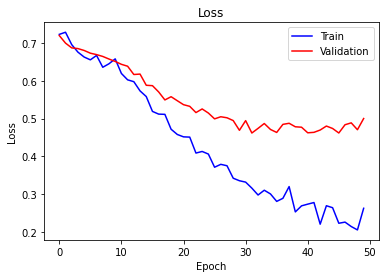

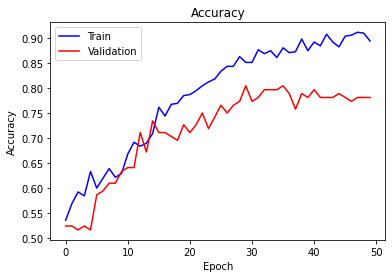

In [41]:
plot_history(history)